ℓ1-Spline
=========

This example demonstrates the use of class [spline.SplineL1](http://sporco.rtfd.org/en/latest/modules/sporco.admm.spline.html#sporco.admm.spline.SplineL1) for removing salt & pepper noise from a greyscale image using ℓ1-spline fitting.

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import spline
from sporco import util
from sporco import signal
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted by 20% salt & pepper noise.

In [3]:
np.random.seed(12345)
imgn = signal.spnoise(img, 0.2)

Set regularization parameter and options for ℓ1-spline solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 5.0
opt = spline.SplineL1.Options({'Verbose': True, 'gEvalY': False})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = spline.SplineL1(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      Reg       r         s         ρ       
----------------------------------------------------------------
   0  4.13e+04  3.23e+04  1.79e+03  2.22e-01  3.80e+00  1.01e+01
   1  3.52e+04  3.35e+04  3.35e+02  1.17e-01  1.98e+00  1.01e+01
   2  3.88e+04  3.68e+04  4.02e+02  1.36e-01  3.60e-01  2.45e+00
   3  3.51e+04  3.35e+04  3.17e+02  1.06e-01  2.35e-01  1.51e+00
   4  3.31e+04  3.15e+04  3.18e+02  8.13e-02  1.22e-01  1.01e+00
   5  3.34e+04  3.18e+04  3.07e+02  6.81e-02  6.62e-02  8.27e-01
   6  3.21e+04  3.05e+04  3.09e+02  5.03e-02  5.41e-02  8.27e-01
   7  3.10e+04  2.94e+04  3.08e+02  3.74e-02  4.22e-02  8.27e-01
   8  3.08e+04  2.92e+04  3.08e+02  2.98e-02  2.87e-02  8.27e-01
   9  3.04e+04  2.89e+04  3.05e+02  2.34e-02  2.34e-02  8.27e-01
  10  3.01e+04  2.85e+04  3.07e+02  1.88e-02  1.84e-02  8.27e-01
  11  2.99e+04  2.84e+04  3.05e+02  1.58e-02  1.33e-02  8.27e-01
  12  2.98e+04  2.83e+04  3.06e+02  1.34e-02  1.08e-02  8.27e-01
  13  2.97e+04  2.82e+04 

  16  2.96e+04  2.80e+04  3.05e+02  8.40e-03  6.09e-03  1.40e+00
  17  2.95e+04  2.80e+04  3.04e+02  7.74e-03  5.45e-03  1.64e+00
  18  2.95e+04  2.80e+04  3.05e+02  7.15e-03  5.32e-03  1.95e+00
  19  2.95e+04  2.80e+04  3.05e+02  6.58e-03  4.97e-03  2.27e+00
  20  2.95e+04  2.79e+04  3.05e+02  6.06e-03  4.80e-03  2.61e+00
  21  2.94e+04  2.79e+04  3.05e+02  5.55e-03  4.45e-03  2.93e+00
  22  2.94e+04  2.79e+04  3.06e+02  5.08e-03  4.38e-03  3.27e+00
  23  2.94e+04  2.79e+04  3.06e+02  4.65e-03  3.71e-03  3.27e+00
  24  2.94e+04  2.78e+04  3.07e+02  4.26e-03  3.72e-03  3.66e+00
  25  2.93e+04  2.78e+04  3.07e+02  3.90e-03  3.26e-03  3.66e+00
  26  2.93e+04  2.78e+04  3.08e+02  3.59e-03  2.85e-03  3.66e+00
  27  2.93e+04  2.78e+04  3.08e+02  3.29e-03  2.85e-03  4.11e+00
  28  2.93e+04  2.78e+04  3.09e+02  3.02e-03  2.61e-03  4.11e+00
  29  2.93e+04  2.78e+04  3.09e+02  2.78e-03  2.27e-03  4.11e+00
  30  2.93e+04  2.77e+04  3.10e+02  2.56e-03  2.27e-03  4.54e+00
  31  2.93e+04  2.77e+04 

  33  2.93e+04  2.77e+04  3.12e+02  2.00e-03  1.57e-03  4.54e+00
  34  2.93e+04  2.77e+04  3.12e+02  1.84e-03  1.59e-03  5.13e+00
  35  2.92e+04  2.77e+04  3.13e+02  1.69e-03  1.44e-03  5.13e+00
  36  2.92e+04  2.77e+04  3.13e+02  1.56e-03  1.29e-03  5.13e+00
  37  2.92e+04  2.77e+04  3.13e+02  1.44e-03  1.28e-03  5.65e+00
  38  2.92e+04  2.77e+04  3.14e+02  1.32e-03  1.16e-03  5.65e+00
  39  2.92e+04  2.77e+04  3.14e+02  1.21e-03  1.03e-03  5.65e+00
  40  2.92e+04  2.77e+04  3.15e+02  1.12e-03  8.96e-04  5.65e+00
  41  2.92e+04  2.76e+04  3.15e+02  1.03e-03  9.28e-04  6.32e+00
  42  2.92e+04  2.76e+04  3.15e+02  9.44e-04  8.40e-04  6.32e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("SplineL1 solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

SplineL1 solve time:  0.52 s
Noisy image PSNR:    11.32 dB
Denoised image PSNR: 27.66 dB


Display reference, corrupted, and denoised images.

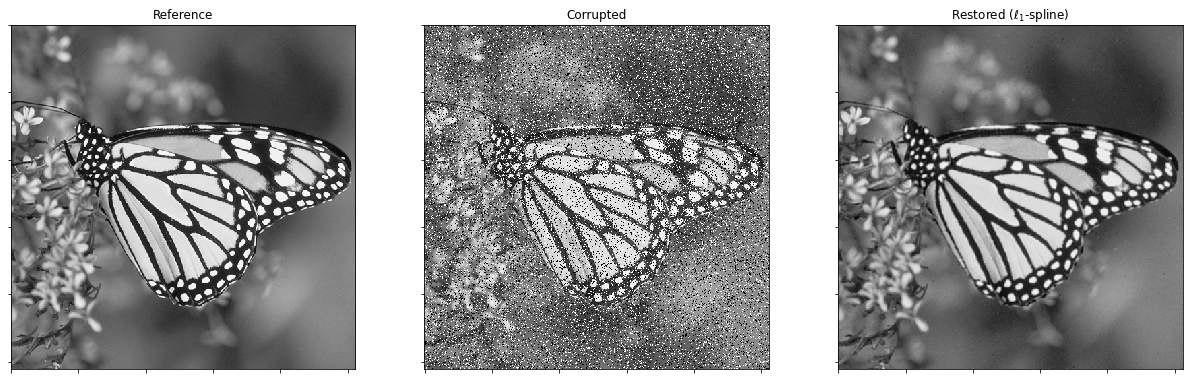

In [7]:
fig = plot.figure(figsize=(21, 7))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-spline)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

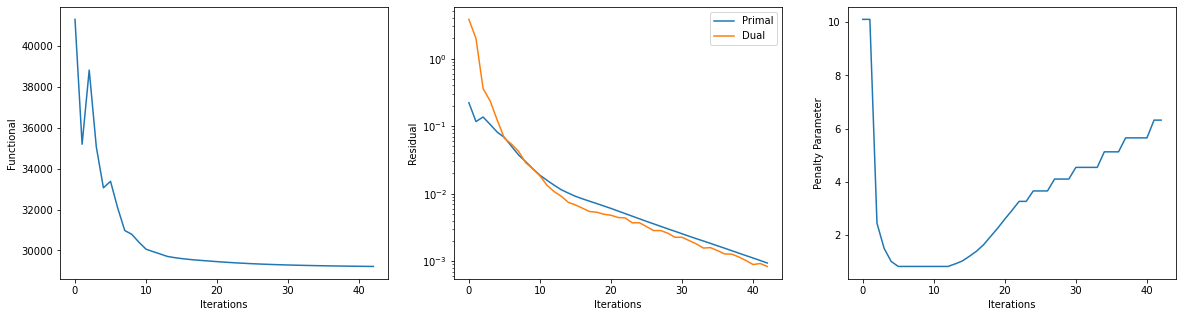

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()